# **A Model of Saliency-Based Visual Attention for Rapid Scene Analysis**
- Source: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=730558

- Model: https://drive.google.com/file/d/1QshsK2nnGScqGKgNMHFP4v_8p3r8_RgQ/view?usp=sharing 

**Libraries**
- Import OpenCV (cv2) which a cross-platform library using which we can develop real-time computer vision applications.
- matplotlib

In [ ]:
# Main function to load the input image
import cv2
import matplotlib.pyplot as plt


# main
if __name__ == '__main__':
    # read
    #img = cv2.imread('/content/sample_data/test3.jpg')
    #img = cv2.imread('/content/sample_data/test2.png')
    #img = cv2.imread('/content/sample_data/doberman.png')
    img  = cv2.imread('/content/sample_data/12.PNG')
    # initialize
    imgsize = img.shape
    img_width  = imgsize[1]
    img_height = imgsize[0]
    

**Optical Flow**
- Optical flow or optic flow is the pattern of apparent motion of objects, surfaces, and edges in a visual scene caused by the relative motion between an observer and a scene. 
- Optical flow can also be defined as the distribution of apparent velocities of movement of brightness pattern in an image.

In [ ]:
# parameters for computing optical flows using the Gunner Farneback's algorithm
farne_pyr_scale = 0.5
farne_levels = 3
farne_winsize = 15
farne_iterations = 3
farne_poly_n = 5
farne_poly_sigma = 1.2
farne_flags = 0

# parameters for detecting local maxima
default_step_local = 16

# feature weights
weight_intensity   = 0.30
weight_color       = 0.30
weight_orientation = 0.20
weight_motion      = 0.20

# coefficients of Gabor filters
GaborKernel_0 = [\
    [ 1.85212E-06, 1.28181E-05, -0.000350433, -0.000136537, 0.002010422, -0.000136537, -0.000350433, 1.28181E-05, 1.85212E-06 ],\
    [ 2.80209E-05, 0.000193926, -0.005301717, -0.002065674, 0.030415784, -0.002065674, -0.005301717, 0.000193926, 2.80209E-05 ],\
    [ 0.000195076, 0.001350077, -0.036909595, -0.014380852, 0.211749204, -0.014380852, -0.036909595, 0.001350077, 0.000195076 ],\
    [ 0.000624940, 0.004325061, -0.118242318, -0.046070008, 0.678352526, -0.046070008, -0.118242318, 0.004325061, 0.000624940 ],\
    [ 0.000921261, 0.006375831, -0.174308068, -0.067914552, 1.000000000, -0.067914552, -0.174308068, 0.006375831, 0.000921261 ],\
    [ 0.000624940, 0.004325061, -0.118242318, -0.046070008, 0.678352526, -0.046070008, -0.118242318, 0.004325061, 0.000624940 ],\
    [ 0.000195076, 0.001350077, -0.036909595, -0.014380852, 0.211749204, -0.014380852, -0.036909595, 0.001350077, 0.000195076 ],\
    [ 2.80209E-05, 0.000193926, -0.005301717, -0.002065674, 0.030415784, -0.002065674, -0.005301717, 0.000193926, 2.80209E-05 ],\
    [ 1.85212E-06, 1.28181E-05, -0.000350433, -0.000136537, 0.002010422, -0.000136537, -0.000350433, 1.28181E-05, 1.85212E-06 ]\
]
GaborKernel_45 = [\
    [  4.04180E-06,  2.25320E-05, -0.000279806, -0.001028923,  3.79931E-05,  0.000744712,  0.000132863, -9.04408E-06, -1.01551E-06 ],\
    [  2.25320E-05,  0.000925120,  0.002373205, -0.013561362, -0.022947700,  0.000389916,  0.003516954,  0.000288732, -9.04408E-06 ],\
    [ -0.000279806,  0.002373205,  0.044837725,  0.052928748, -0.139178011, -0.108372072,  0.000847346,  0.003516954,  0.000132863 ],\
    [ -0.001028923, -0.013561362,  0.052928748,  0.460162150,  0.249959607, -0.302454279, -0.108372072,  0.000389916,  0.000744712 ],\
    [  3.79931E-05, -0.022947700, -0.139178011,  0.249959607,  1.000000000,  0.249959607, -0.139178011, -0.022947700,  3.79931E-05 ],\
    [  0.000744712,  0.003899160, -0.108372072, -0.302454279,  0.249959607,  0.460162150,  0.052928748, -0.013561362, -0.001028923 ],\
    [  0.000132863,  0.003516954,  0.000847346, -0.108372072, -0.139178011,  0.052928748,  0.044837725,  0.002373205, -0.000279806 ],\
    [ -9.04408E-06,  0.000288732,  0.003516954,  0.000389916, -0.022947700, -0.013561362,  0.002373205,  0.000925120,  2.25320E-05 ],\
    [ -1.01551E-06, -9.04408E-06,  0.000132863,  0.000744712,  3.79931E-05, -0.001028923, -0.000279806,  2.25320E-05,  4.04180E-06 ]\
]
GaborKernel_90 = [\
    [  1.85212E-06,  2.80209E-05,  0.000195076,  0.000624940,  0.000921261,  0.000624940,  0.000195076,  2.80209E-05,  1.85212E-06 ],\
    [  1.28181E-05,  0.000193926,  0.001350077,  0.004325061,  0.006375831,  0.004325061,  0.001350077,  0.000193926,  1.28181E-05 ],\
    [ -0.000350433, -0.005301717, -0.036909595, -0.118242318, -0.174308068, -0.118242318, -0.036909595, -0.005301717, -0.000350433 ],\
    [ -0.000136537, -0.002065674, -0.014380852, -0.046070008, -0.067914552, -0.046070008, -0.014380852, -0.002065674, -0.000136537 ],\
    [  0.002010422,  0.030415784,  0.211749204,  0.678352526,  1.000000000,  0.678352526,  0.211749204,  0.030415784,  0.002010422 ],\
    [ -0.000136537, -0.002065674, -0.014380852, -0.046070008, -0.067914552, -0.046070008, -0.014380852, -0.002065674, -0.000136537 ],\
    [ -0.000350433, -0.005301717, -0.036909595, -0.118242318, -0.174308068, -0.118242318, -0.036909595, -0.005301717, -0.000350433 ],\
    [  1.28181E-05,  0.000193926,  0.001350077,  0.004325061,  0.006375831,  0.004325061,  0.001350077,  0.000193926,  1.28181E-05 ],\
    [  1.85212E-06,  2.80209E-05,  0.000195076,  0.000624940,  0.000921261,  0.000624940,  0.000195076,  2.80209E-05,  1.85212E-06 ]
]
GaborKernel_135 = [\
    [ -1.01551E-06, -9.04408E-06,  0.000132863,  0.000744712,  3.79931E-05, -0.001028923, -0.000279806, 2.2532E-05, 4.0418E-06 ],\
    [ -9.04408E-06,  0.000288732,  0.003516954,  0.000389916, -0.022947700, -0.013561362, 0.002373205, 0.00092512, 2.2532E-05 ],\
    [  0.000132863,  0.003516954,  0.000847346, -0.108372072, -0.139178011, 0.052928748, 0.044837725, 0.002373205, -0.000279806 ],\
    [  0.000744712,  0.000389916, -0.108372072, -0.302454279,  0.249959607, 0.46016215, 0.052928748, -0.013561362, -0.001028923 ],\
    [  3.79931E-05, -0.022947700, -0.139178011,  0.249959607,  1.000000000, 0.249959607, -0.139178011, -0.0229477, 3.79931E-05 ],\
    [ -0.001028923, -0.013561362,  0.052928748,  0.460162150,  0.249959607, -0.302454279, -0.108372072, 0.000389916, 0.000744712 ],\
    [ -0.000279806,  0.002373205,  0.044837725,  0.052928748, -0.139178011, -0.108372072, 0.000847346, 0.003516954, 0.000132863 ],\
    [  2.25320E-05,  0.000925120,  0.002373205, -0.013561362, -0.022947700, 0.000389916, 0.003516954, 0.000288732, -9.04408E-06 ],\
    [  4.04180E-06,  2.25320E-05, -0.000279806, -0.001028923,  3.79931E-05 , 0.000744712, 0.000132863, -9.04408E-06, -1.01551E-06 ]\
]

In [ ]:
#  Itti Saliecny Model

import numpy as np

class pySaliencyMap:
    # initialization
    def __init__(self, width, height):
        self.width  = width
        self.height = height
        self.prev_frame = None
        self.SM = None
        self.GaborKernel0   = np.array(GaborKernel_0)
        self.GaborKernel45  = np.array(GaborKernel_45)
        self.GaborKernel90  = np.array(GaborKernel_90)
        self.GaborKernel135 = np.array(GaborKernel_135)

    # extracting color channels
    def SMExtractRGBI(self, inputImage):
        # convert scale of array elements
        src = np.float32(inputImage) * 1./255
        # split
        (B, G, R) = cv2.split(src)
        # extract an intensity image
        I = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        # return
        return R, G, B, I

    # feature maps
    ## constructing a Gaussian pyramid
    def FMCreateGaussianPyr(self, src):
        dst = list()
        dst.append(src)
        for i in range(1,9):
            nowdst = cv2.pyrDown(dst[i-1])
            dst.append(nowdst)
        return dst
    ## taking center-surround differences
    def FMCenterSurroundDiff(self, GaussianMaps):
        dst = list()
        for s in range(2,5):
            now_size = GaussianMaps[s].shape
            now_size = (now_size[1], now_size[0])  ## (width, height)
            tmp = cv2.resize(GaussianMaps[s+3], now_size, interpolation=cv2.INTER_LINEAR)
            nowdst = cv2.absdiff(GaussianMaps[s], tmp)
            dst.append(nowdst)
            tmp = cv2.resize(GaussianMaps[s+4], now_size, interpolation=cv2.INTER_LINEAR)
            nowdst = cv2.absdiff(GaussianMaps[s], tmp)
            dst.append(nowdst)
        return dst
    ## constructing a Gaussian pyramid + taking center-surround differences
    def FMGaussianPyrCSD(self, src):
        GaussianMaps = self.FMCreateGaussianPyr(src)
        dst = self.FMCenterSurroundDiff(GaussianMaps)
        return dst
    ## intensity feature maps
    def IFMGetFM(self, I):
        return self.FMGaussianPyrCSD(I)
    ## color feature maps
    def CFMGetFM(self, R, G, B):
        # max(R,G,B)
        tmp1 = cv2.max(R, G)
        RGBMax = cv2.max(B, tmp1)
        RGBMax[RGBMax <= 0] = 0.0001    # prevent dividing by 0
        # min(R,G)
        RGMin = cv2.min(R, G)
        # RG = (R-G)/max(R,G,B)
        RG = (R - G) / RGBMax
        # BY = (B-min(R,G)/max(R,G,B)
        BY = (B - RGMin) / RGBMax
        # clamp nagative values to 0
        RG[RG < 0] = 0
        BY[BY < 0] = 0
        # obtain feature maps in the same way as intensity
        RGFM = self.FMGaussianPyrCSD(RG)
        BYFM = self.FMGaussianPyrCSD(BY)
        # return
        return RGFM, BYFM
    ## orientation feature maps
    def OFMGetFM(self, src):
        # creating a Gaussian pyramid
        GaussianI = self.FMCreateGaussianPyr(src)
        # convoluting a Gabor filter with an intensity image to extract oriemtation features
        GaborOutput0   = [ np.empty((1,1)), np.empty((1,1)) ]  # dummy data: any kinds of np.array()s are OK
        GaborOutput45  = [ np.empty((1,1)), np.empty((1,1)) ]
        GaborOutput90  = [ np.empty((1,1)), np.empty((1,1)) ]
        GaborOutput135 = [ np.empty((1,1)), np.empty((1,1)) ]
        for j in range(2,9):
            GaborOutput0.append(   cv2.filter2D(GaussianI[j], cv2.CV_32F, self.GaborKernel0) )
            GaborOutput45.append(  cv2.filter2D(GaussianI[j], cv2.CV_32F, self.GaborKernel45) )
            GaborOutput90.append(  cv2.filter2D(GaussianI[j], cv2.CV_32F, self.GaborKernel90) )
            GaborOutput135.append( cv2.filter2D(GaussianI[j], cv2.CV_32F, self.GaborKernel135) )
        # calculating center-surround differences for every oriantation
        CSD0   = self.FMCenterSurroundDiff(GaborOutput0)
        CSD45  = self.FMCenterSurroundDiff(GaborOutput45)
        CSD90  = self.FMCenterSurroundDiff(GaborOutput90)
        CSD135 = self.FMCenterSurroundDiff(GaborOutput135)
        # concatenate
        dst = list(CSD0)
        dst.extend(CSD45)
        dst.extend(CSD90)
        dst.extend(CSD135)
        # return
        return dst
    ## motion feature maps
    def MFMGetFM(self, src):
        # convert scale
        I8U = np.uint8(255 * src)
        cv2.waitKey(10)
        # calculating optical flows
        if self.prev_frame is not None:
            farne_pyr_scale= farne_pyr_scale
            farne_levels = farne_levels
            farne_winsize = farne_winsize
            farne_iterations = farne_iterations
            farne_poly_n = farne_poly_n
            farne_poly_sigma = farne_poly_sigma
            farne_flags = farne_flags
            flow = cv2.calcOpticalFlowFarneback(\
                prev = self.prev_frame, \
                next = I8U, \
                pyr_scale = farne_pyr_scale, \
                levels = farne_levels, \
                winsize = farne_winsize, \
                iterations = farne_iterations, \
                poly_n = farne_poly_n, \
                poly_sigma = farne_poly_sigma, \
                flags = farne_flags, \
                flow = None \
            )
            flowx = flow[...,0]
            flowy = flow[...,1]
        else:
            flowx = np.zeros(I8U.shape)
            flowy = np.zeros(I8U.shape)
        # create Gaussian pyramids
        dst_x = self.FMGaussianPyrCSD(flowx)
        dst_y = self.FMGaussianPyrCSD(flowy)
        # update the current frame
        self.prev_frame = np.uint8(I8U)
        # return
        return dst_x, dst_y

    # conspicuity maps
    ## standard range normalization
    def SMRangeNormalize(self, src):
        minn, maxx, dummy1, dummy2 = cv2.minMaxLoc(src)
        if maxx!=minn:
            dst = src/(maxx-minn) + minn/(minn-maxx)
        else:
            dst = src - minn
        return dst
    ## computing an average of local maxima
    def SMAvgLocalMax(self, src):
        # size
        stepsize = default_step_local
        width = src.shape[1]
        height = src.shape[0]
        # find local maxima
        numlocal = 0
        lmaxmean = 0
        for y in range(0, height-stepsize, stepsize):
            for x in range(0, width-stepsize, stepsize):
                localimg = src[y:y+stepsize, x:x+stepsize]
                lmin, lmax, dummy1, dummy2 = cv2.minMaxLoc(localimg)
                lmaxmean += lmax
                numlocal += 1
        # averaging over all the local regions
        return lmaxmean / numlocal
    ## normalization specific for the saliency map model
    def SMNormalization(self, src):
        dst = self.SMRangeNormalize(src)
        lmaxmean = self.SMAvgLocalMax(dst)
        normcoeff = (1-lmaxmean)*(1-lmaxmean)
        return dst * normcoeff
    ## normalizing feature maps
    def normalizeFeatureMaps(self, FM):
        NFM = list()
        for i in range(0,6):
            normalizedImage = self.SMNormalization(FM[i])
            nownfm = cv2.resize(normalizedImage, (self.width, self.height), interpolation=cv2.INTER_LINEAR)
            NFM.append(nownfm)
        return NFM
    ## intensity conspicuity map
    def ICMGetCM(self, IFM):
        NIFM = self.normalizeFeatureMaps(IFM)
        ICM = sum(NIFM)
        return ICM
    ## color conspicuity map
    def CCMGetCM(self, CFM_RG, CFM_BY):
        # extracting a conspicuity map for every color opponent pair
        CCM_RG = self.ICMGetCM(CFM_RG)
        CCM_BY = self.ICMGetCM(CFM_BY)
        # merge
        CCM = CCM_RG + CCM_BY
        # return
        return CCM
    ## orientation conspicuity map
    def OCMGetCM(self, OFM):
        OCM = np.zeros((self.height, self.width))
        for i in range (0,4):
            # slicing
            nowofm = OFM[i*6:(i+1)*6]  # angle = i*45
            # extracting a conspicuity map for every angle
            NOFM = self.ICMGetCM(nowofm)
            # normalize
            NOFM2 = self.SMNormalization(NOFM)
            # accumulate
            OCM += NOFM2
        return OCM
    ## motion conspicuity map
    def MCMGetCM(self, MFM_X, MFM_Y):
        return self.CCMGetCM(MFM_X, MFM_Y)

    # core
    def SMGetSM(self, src):
        # definitions
        size = src.shape
        width  = size[1]
        height = size[0]
        # check
#        if(width != self.width or height != self.height):
#            sys.exit("size mismatch")
        # extracting individual color channels
        R, G, B, I = self.SMExtractRGBI(src)
        # extracting feature maps
        IFM = self.IFMGetFM(I)
        CFM_RG, CFM_BY = self.CFMGetFM(R, G, B)
        OFM = self.OFMGetFM(I)
        MFM_X, MFM_Y = self.MFMGetFM(I)
        # extracting conspicuity maps
        ICM = self.ICMGetCM(IFM)
        CCM = self.CCMGetCM(CFM_RG, CFM_BY)
        OCM = self.OCMGetCM(OFM)
        MCM = self.MCMGetCM(MFM_X, MFM_Y)
        # adding all the conspicuity maps to form a saliency map
        wi = weight_intensity
        wc = weight_color
        wo = weight_orientation
        wm = weight_motion
        SMMat = wi*ICM + wc*CCM + wo*OCM + wm*MCM
        # normalize
        normalizedSM = self.SMRangeNormalize(SMMat)
        normalizedSM2 = normalizedSM.astype(np.float32)
        smoothedSM = cv2.bilateralFilter(normalizedSM2, 7, 3, 1.55)
        self.SM = cv2.resize(smoothedSM, (width,height), interpolation=cv2.INTER_NEAREST)
        # return
        return self.SM

    def SMGetBinarizedSM(self, src):
        # get a saliency map
        if self.SM is None:
            self.SM = self.SMGetSM(src)
        # convert scale
        SM_I8U = np.uint8(255 * self.SM)
        # binarize
        thresh, binarized_SM = cv2.threshold(SM_I8U, thresh=0, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        return binarized_SM

    def SMGetSalientRegion(self, src):
        # get a binarized saliency map
        binarized_SM = self.SMGetBinarizedSM(src)
        # GrabCut
        img = src.copy()
        mask =  np.where((binarized_SM!=0), cv2.GC_PR_FGD, cv2.GC_PR_BGD).astype('uint8')
        bgdmodel = np.zeros((1,65),np.float64)
        fgdmodel = np.zeros((1,65),np.float64)
        rect = (0,0,1,1)  # dummy
        iterCount = 1
        cv2.grabCut(img, mask=mask, rect=rect, bgdModel=bgdmodel, fgdModel=fgdmodel, iterCount=iterCount, mode=cv2.GC_INIT_WITH_MASK)
        # post-processing
        mask_out = np.where((mask==cv2.GC_FGD) + (mask==cv2.GC_PR_FGD), 255, 0).astype('uint8')
        output = cv2.bitwise_and(img,img,mask=mask_out)
        return output

**Call the itti saliency model to compute image saliency **

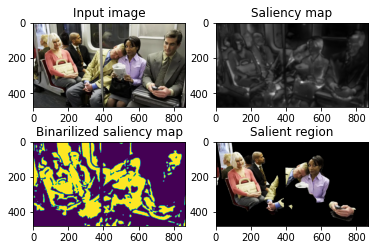

In [ ]:
    sm = pySaliencyMap(img_width, img_height)
# computation
    saliency_map = sm.SMGetSM(img)
    binarized_map = sm.SMGetBinarizedSM(img)
    salient_region = sm.SMGetSalientRegion(img)
    # visualize
#    plt.subplot(2,2,1), plt.imshow(img, 'gray')
    plt.subplot(2,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input image')
#    cv2.imshow("input",  img)
    plt.subplot(2,2,2), plt.imshow(saliency_map, 'gray')
    plt.title('Saliency map')
#    cv2.imshow("output", map)
    plt.subplot(2,2,3), plt.imshow(binarized_map)
    plt.title('Binarilized saliency map')
#    cv2.imshow("Binarized", binarized_map)
    plt.subplot(2,2,4), plt.imshow(cv2.cvtColor(salient_region, cv2.COLOR_BGR2RGB))
    plt.title('Salient region')
#    cv2.imshow("Segmented", segmented_map)

    plt.show()
#    cv2.waitKey(0)
    cv2.destroyAllWindows()